### Optimizing Logistic Regression Through Implementation of Gradient Descent

This algorithm has been implemented in the file LogisticRegression.py

```
from LogisticRegression import LogisticRegression
```

Here is a link to the LogisticRegression class:

------------------------------------------------------------------------------

Within the LogisticRegression Class there are 4 key functions:

```
LogisticRegression.fit(X,y)   #fits our logistic regression model to the data using gradient descent and initializes LogisticRegression.w, LogisticRegression.loss_history, LogisticRegression.score_history

LogisticRegression.fit_stocastic(X,y)   #does the same as the fit method but implements stocastic gradient descent

LogisticRegression.predict(X) #predicts labels based on feature matrix

LogisticRegression.score(X,y) #determines accuracy of predicted labels
```

LogisticRegression.fit(X,y) works as follows:
1. Initialize a random initial weight vector 
2. Then, until termination:
* $\triangledown$ L(w) = $\frac{1}{n}$ $\sum_{i=1}^{n}$ $\triangledown$ l ($f_{w}$ ($x_{i}$) $y_{i}$)

Where n is the length of the feature matrix

LogisticRegression.fit_stocastic(X,y) works as follows:
1. Initialize a random initial weight vector 
2. Then, until termination:
* $\triangledown$ $L_{s}$ (w) = $\frac{1}{s}$ $\sum_{i=1}^{s}$ $\triangledown$ l ($f_{w}$ ($x_{i}$) $y_{i}$)

Where s is the batch size

### Seeing Logistic Regression in Action

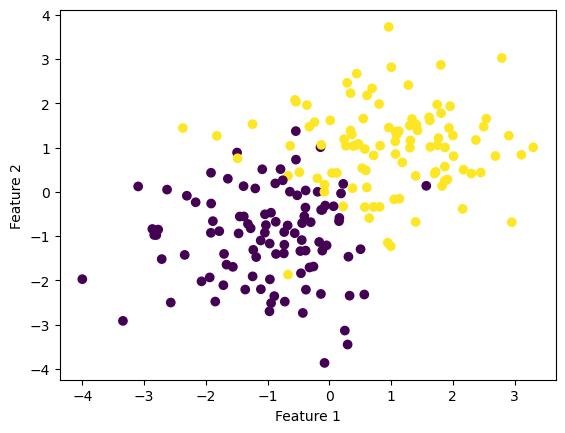

In [1]:
from LogisticRegression import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#### Performing Logistic Regression with gradient descent

Here is an example of optimizing logisitc regression with gradient descent:

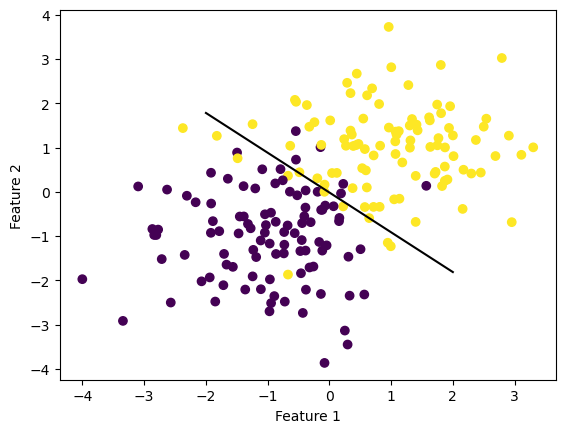

In [2]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 1, max_epochs = 10000)

# inspect the fitted value of w
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(LR.w, -2, 2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Here is a graph of the change in loss calculated:

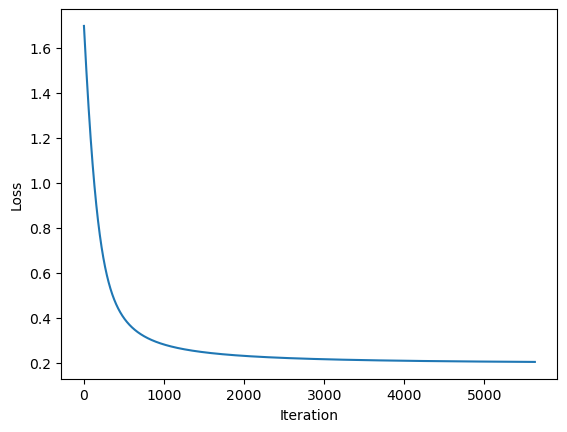

In [3]:
fig = plt.plot(LR.loss_history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

Here is a graph of the change in loss calculated when using stochastic gradient descent:

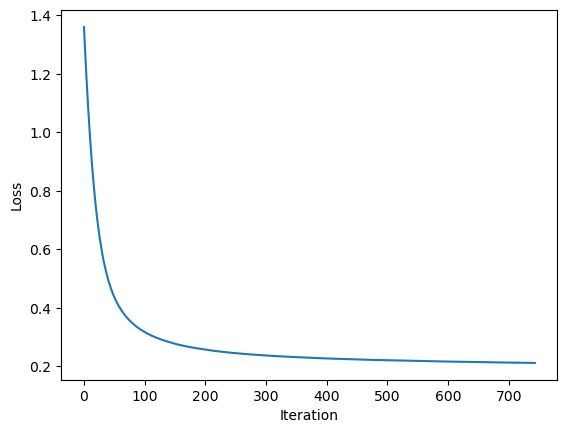

In [4]:
# fit the model

LR_sto = LogisticRegression()
LR_sto.fit_stochastic(X, y, alpha = 0.01, max_epochs = 10000)


fig = plt.plot(LR_sto.loss_history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

Here is a graph comparing the evolution of loss for both gradient descent and stochastic gradient descent:

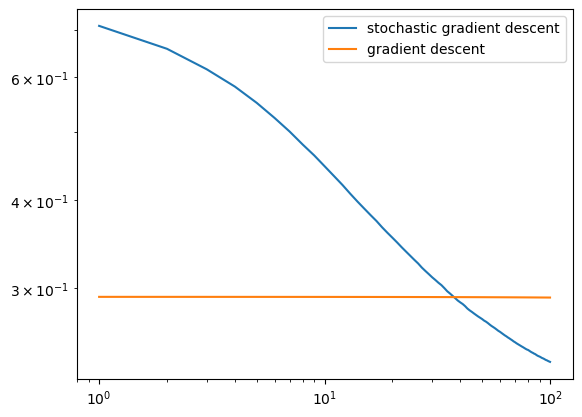

In [5]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100,  
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient descent")


LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient descent")

plt.loglog()

legend = plt.legend() 

### Experiments


#### Experiment 1

The purpose of this experiment is to determine if there is a learning rate too high for the model to converge to a minimizer. As a result, I performed logistic regression on the data with varying values for the learning rate. I then plotted all of these models' score history to determine if the models actually do converge to a minimizer.

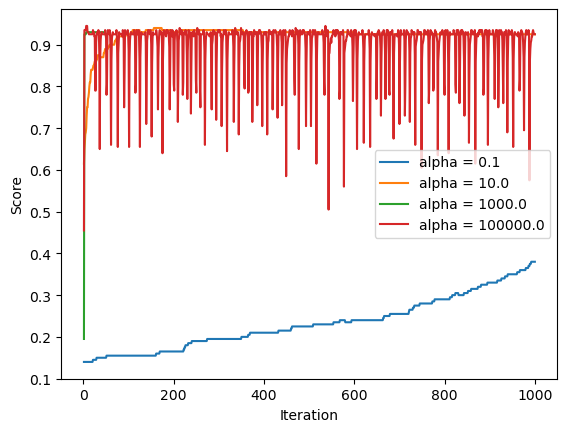

In [6]:
"""
A case in which gradient descent does not converge to a minimizer because the learning rate 
alpha is too large.
"""
LR1 = 0
a = 0.1

while a < 1000000:
    LR1 = LogisticRegression()
    LR1.fit(X, y, alpha = a, max_epochs=1000)

    num_steps = len(LR1.loss_history)
    plt.plot(np.arange(num_steps) + 1, LR1.score_history, label = "alpha = "+str(a))

    a *= 100

xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Score")
plt.legend()


#### Conclusion to Experiment 1

This graph shows that with a learning rate of 100,000, the model fails to converge.


#### Experiment 2

The purpose of this experiment is to determine how the size of the batches in stocastic gradient descent affects how quickly the algorithm converges. In order to do this, we ran the algorithm with varying batch sizes and compared how long it takes for the algorithm to converge.

'\nLR = LogisticRegression()\nLR.fit_stochastic(X, y, \n                  max_epochs = 1000,  \n                  batch_size = 100, \n                  alpha = .05) \n\nnum_steps = len(LR.score_history)\nplt.plot(np.arange(num_steps) + 1, LR.score_history, label = "batch size: 100")\n\nLR = LogisticRegression()\nLR.fit_stochastic(X, y, \n                  max_epochs = 1000,  \n                  batch_size = 200, \n                  alpha = .05) \n\nnum_steps = len(LR.score_history)\nplt.plot(np.arange(num_steps) + 1, LR.score_history, label = "batch size: 200")\n\nLR = LogisticRegression()\nLR.fit_stochastic(X, y, \n                  max_epochs = 1000,  \n                  batch_size = 300, \n                  alpha = .05) \n\nnum_steps = len(LR.score_history)\nplt.plot(np.arange(num_steps) + 1, LR.score_history, label = "batch size: 300")\n\nxlab = plt.xlabel("Iteration")\nylab = plt.ylabel("Score")\nplt.legend()\n'

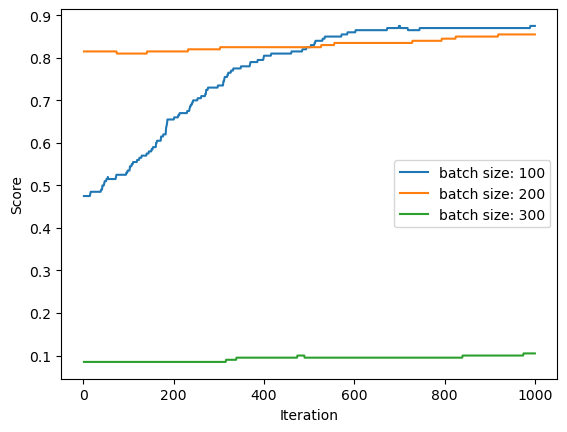

In [7]:
LR = 0
batch = 100

while batch < 400:
    LR = LogisticRegression()
    LR.fit_stochastic(X, y, 
                    max_epochs = 1000,  
                    batch_size = batch, 
                    alpha = .05) 

    num_steps = len(LR.score_history)
    plt.plot(np.arange(num_steps) + 1, LR.score_history, label = "batch size: "+str(batch))
    batch += 100

xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Score")
plt.legend()


#### Conclusion to Experiment 2

The greater the size of each batch, the longer it takes for the algorithm to converge.